In [23]:
import pydicom 
import pandas as pd
import os
import numpy as np
import scipy
import torch
from tqdm import tqdm

In [3]:
df = [
        pd.read_parquet('../../Data/train_dataset.parquet', engine='pyarrow'),
    pd.read_parquet('../../Data/val_dataset.parquet', engine='pyarrow'),
    pd.read_parquet('../../Data/test_dataset.parquet', engine='pyarrow')
]

In [4]:
df = pd.concat(df)

In [19]:
os.makedirs('../../Data/resized_224')

In [24]:
data = df.values 
for index in tqdm(range(len(data))):
    dcm_path, pat_id, study_date, score = data[index]
    dcm = pydicom.read_file(os.path.join('../../Data/',dcm_path))
    image = dcm.pixel_array.astype(float)
    image = torch.tensor(image).unsqueeze(0).unsqueeze(0)
    image = torch.nn.functional.interpolate(image, size=224, mode='bilinear')
    image = image.numpy()
    save_path = os.path.join('../../Data/resized_224',dcm_path.replace('.dcm','.npy'))
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    np.save(save_path, image)

100%|██████████| 2480/2480 [02:40<00:00, 15.41it/s]


In [26]:
data = df.values 
for index in tqdm(range(len(data))):
    dcm_path, pat_id, study_date, score = data[index]
    if score == 4:
        dcm = pydicom.read_file(os.path.join('../../Data/',dcm_path))
        image = dcm.pixel_array.astype(float)
        break

  0%|          | 6/2480 [00:00<00:05, 454.94it/s]


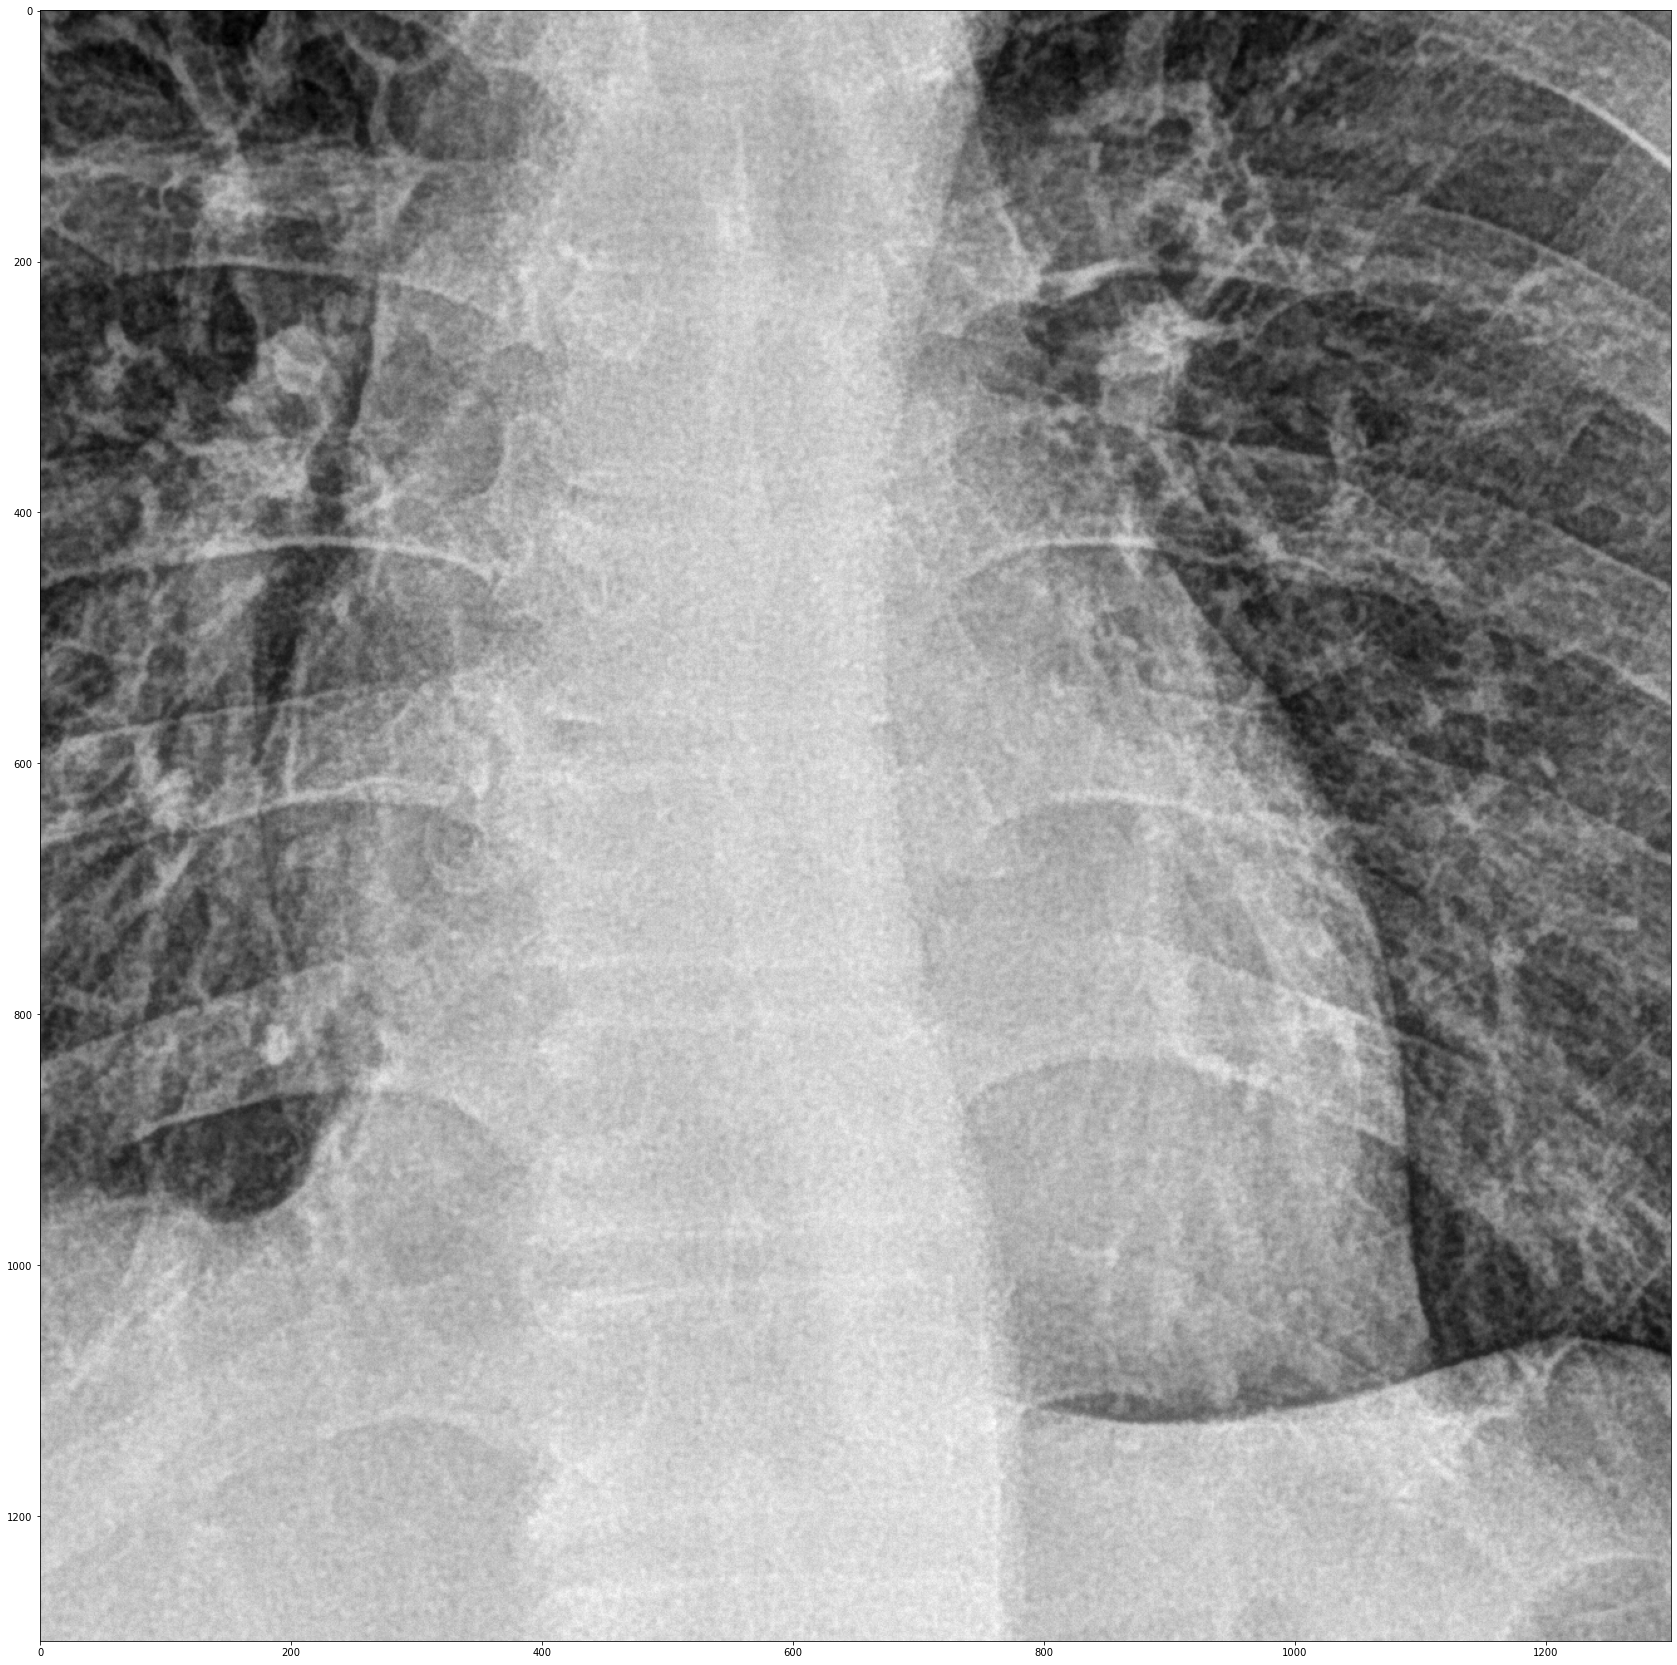

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(image[1000:2300, 1000:2300], cmap='gray')
plt.show()